In [5]:
import numpy as np
import sklearn.datasets as datasets 
# matplotlib 绘图库
# 加入此配置用于显示图像
%matplotlib inline 
import matplotlib.pyplot as plt


(200,)

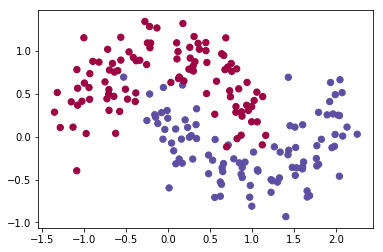

In [33]:
# Generate a dataset and  plot it
np.random.seed(0)
x, y = datasets.make_moons(200, noise = 0.20)
plt.scatter(x[:,0], x[:,1], s = 40, c = y, cmap = plt.cm .Spectral)
# 红点标识女病人，蓝点标识男病人，x,y代表药物治疗
# 目标： 在给定x，y的情况下预测正确的男女（分类问题）

Text(0.5,1,'Logistic Regerssion')

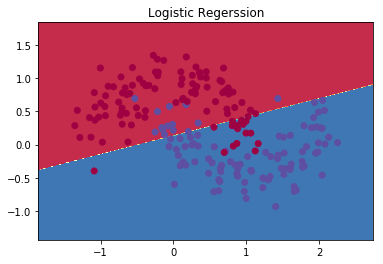

In [39]:
# 使用线性分类器 Logistic回归尝试分类
import sklearn.linear_model as linear_model

clf = linear_model.LogisticRegressionCV()
clf.fit(x, y)

# 描绘预测边界
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = x[:, 0].min() - .5, x[:, 0].max() + .5
    y_min, y_max = x[:, 1].min() - .5, x[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.Spectral)

plot_decision_boundary(lambda x : clf.predict(x))
plt.title('Logistic Regerssion')

In [41]:
# 使用具有一个输入层，一个隐藏层，一个输出层的简单神经网络来进行分类
# 输入层节点数由数据维度决定 （x, y）
# 输出层节点数由分类类别决定 1： 女性的概率 0：男性的概率
# 隐藏层激活函数使用tanh函数，优点是导数可以使用原函数值计算出来。
# 输出层激活函数是softmax，它可以将原始分数转换为概率。

# parmas defination
train_set_size = len(x)
input_dimension = 2
output_dimension = 2
learning_rate = 0.01
regularization_strength = 0.01

# loss function
def loss(model):
    w1, b1, w2, b2 = model['w1'], model['b1'], model['w2'], model['b2']
    
    z1 = x.dot(w1) + b1
    a1 = np.tanh(z1)
    z2 = al.dot(w2) + b2
    
    exp_scores = np.exp(z2)
    probs =  exp_scores / np.sum(exp_scores, axis = 1, keepdims = True)
    corect_logprobs = -np.log(probs[range(train_set_size), y])
    data_loss = np.sum(corect_logprobs)
    data_loss = regularization_strength / 2 * (np.sum(np.square(w1)) + np.sum(np.square(w2)))
    return 1. / train_set_size * data_loss

# predict function
def predict(model, x):
    w1, b1, w2, b2 = model['w1'], model['b1'], model['w2'], model['b2']
    
    z1 = x.dot(w1) + b1
    a1 = np.tanh(z1)
    z2 = al.dot(w2) + b2
    
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis = 1, keepdims = True)
    return np.argmax(probs, axis = 1)



200